In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
pip uninstall 

In [25]:
#Steps needed if you want to install kaleido so you can get static images
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:37
🔁 Restarting kernel...


In [2]:
!conda install -c conda-forge python-kaleido

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python-kaleido


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       ha878542_0         149 KB  conda-forge
    certifi-2022.6.15          |   py37h89c1867_0         155 KB  conda-forge
    conda-4.13.0               |   py37h89c1867_2         986 KB  conda-forge
    expat-2.2.10               |       h9c3ff4c_0         164 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |     

In [3]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px 
import kaleido

In [4]:
project_id = 'bq-public-project'

In [5]:
client = bigquery.Client(project=project_id)

In [62]:
trip_distance_and_fare_query = """
select trip_distance,total_amount,pickup_datetime,dropoff_datetime,passenger_count
 from `bq-public-project.nyc_tlc_trips.tlc_green_trips_2022` 
where total_amount>=0 and trip_distance>=0 
order by rand() limit 10000
"""




In [63]:
trip_distance_and_fare = client.query(trip_distance_and_fare_query,project=project_id).to_dataframe()

In [64]:
trip_distance_and_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   trip_distance     10000 non-null  object             
 1   total_amount      10000 non-null  object             
 2   pickup_datetime   10000 non-null  datetime64[ns, UTC]
 3   dropoff_datetime  10000 non-null  datetime64[ns, UTC]
 4   passenger_count   8946 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(1), object(2)
memory usage: 390.8+ KB


In [65]:
trip_distance_and_fare = trip_distance_and_fare.dropna()

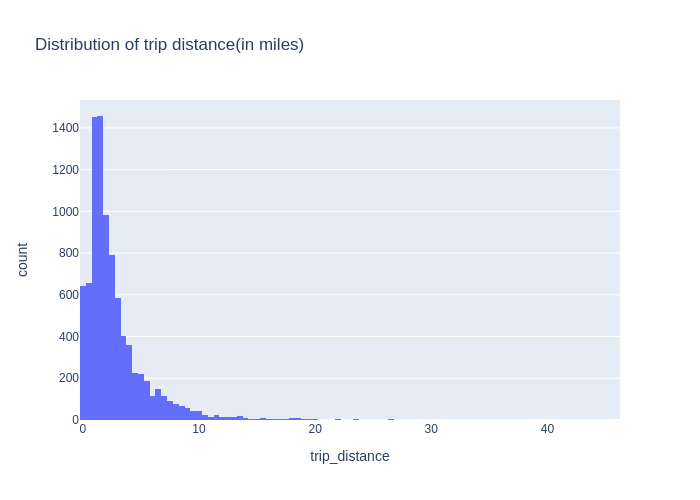

In [70]:
fig = px.histogram(trip_distance_and_fare,x='trip_distance',title="Distribution of trip distance(in miles)",nbins=100)
fig.show("png")

In [71]:
print("median distance ",trip_distance_and_fare['trip_distance'].median())

median distance  1.87


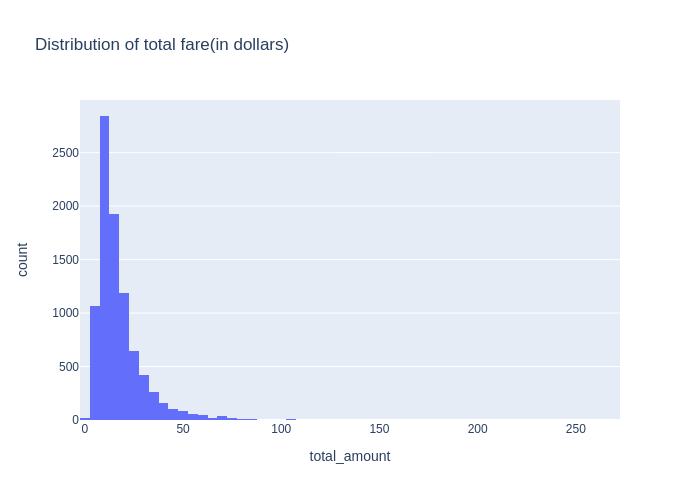

In [73]:
fig = px.histogram(trip_distance_and_fare,x='total_amount',title="Distribution of total fare(in dollars)",nbins=100)
fig.show("png")

In [74]:
print("median fare ",trip_distance_and_fare['total_amount'].median())

median fare  13.8


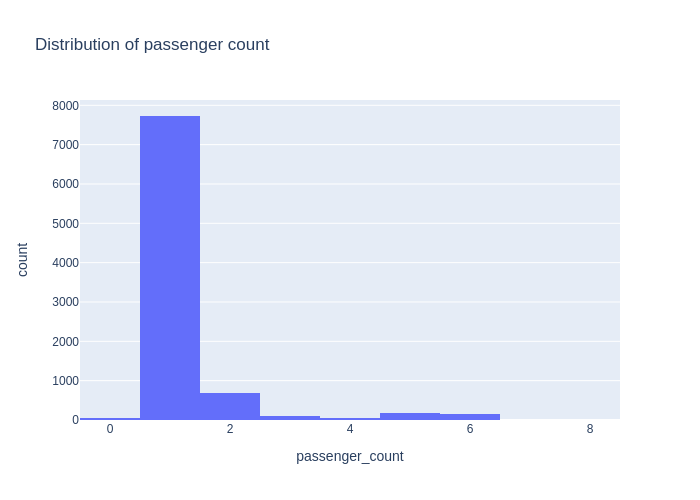

In [76]:
fig = px.histogram(trip_distance_and_fare,x='passenger_count',title="Distribution of passenger count")
fig.show("png")

In [77]:
trip_distance_and_fare['duration'] = (trip_distance_and_fare['dropoff_datetime'] - trip_distance_and_fare['pickup_datetime']).astype('timedelta64[m]')

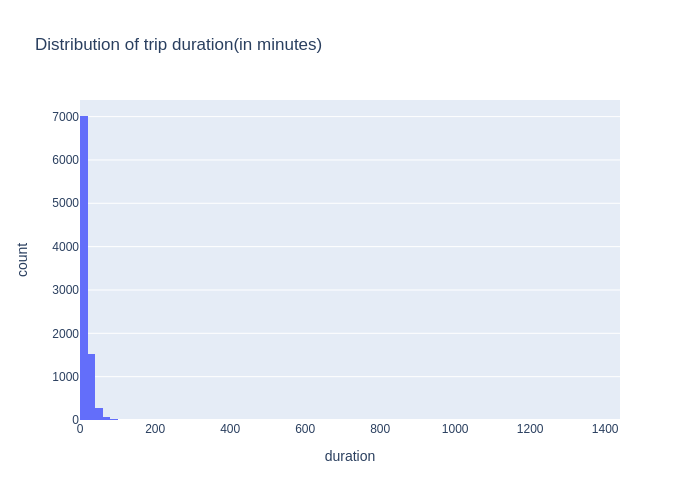

In [79]:
fig = px.histogram(trip_distance_and_fare,x='duration',title="Distribution of trip duration(in minutes)",nbins=100)
fig.show("png")

In [80]:
trip_distance_and_fare['dropoff_hour'] = trip_distance_and_fare['dropoff_datetime'].dt.hour
trip_distance_and_fare['dropoff_day_of_week'] = trip_distance_and_fare['dropoff_datetime'].dt.day_name()

In [81]:
trip_distance_and_fare

,trip_distance,total_amount,pickup_datetime,dropoff_datetime,passenger_count,duration,dropoff_hour,dropoff_day_of_week
0,1.67,10.8,2022-04-26 14:48:27+00:00,2022-04-26 15:01:36+00:00,1.0,13.0,15,Tuesday
1,9.86,35.76,2022-03-20 17:35:49+00:00,2022-03-20 17:58:45+00:00,1.0,22.0,17,Sunday
2,1.93,14.05,2022-02-11 15:07:14+00:00,2022-02-11 15:20:16+00:00,1.0,13.0,15,Friday
3,1.4,10.55,2022-04-30 23:52:36+00:00,2022-04-30 23:59:55+00:00,1.0,7.0,23,Saturday
4,1.12,6.3,2022-03-23 09:19:02+00:00,2022-03-23 09:23:57+00:00,4.0,4.0,9,Wednesday
...,...,...,...,...,...,...,...,...
9994,3.46,17.76,2022-02-05 18:31:28+00:00,2022-02-05 18:47:39+00:00,6.0,16.0,18,Saturday
9996,1.64,14.55,2022-01-20 01:41:48+00:00,2022-01-20 01:48:42+00:00,1.0,6.0,1,Thursday
9997,17.46,71.22,2022-01-08 17:53:50+00:00,2022-01-08 18:24:01+00:00,1.0,30.0,18,Saturday
9998,1.73,15.66,2022-01-20 18:03:55+00:00,2022-01-20 18:13:49+00:00,1.0,9.0,18,Thursday


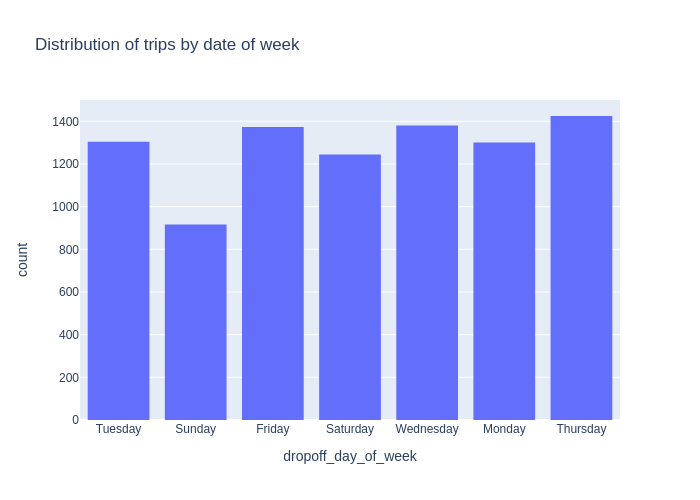

In [83]:
fig = px.histogram(trip_distance_and_fare,x='dropoff_day_of_week',title="Distribution of trips by date of week")
fig.show("png")

In [84]:
x = trip_distance_and_fare[['total_amount','dropoff_day_of_week']].groupby(['dropoff_day_of_week']).mean().reset_index()
med = trip_distance_and_fare[['total_amount','dropoff_day_of_week']].groupby(['dropoff_day_of_week']).median().reset_index()

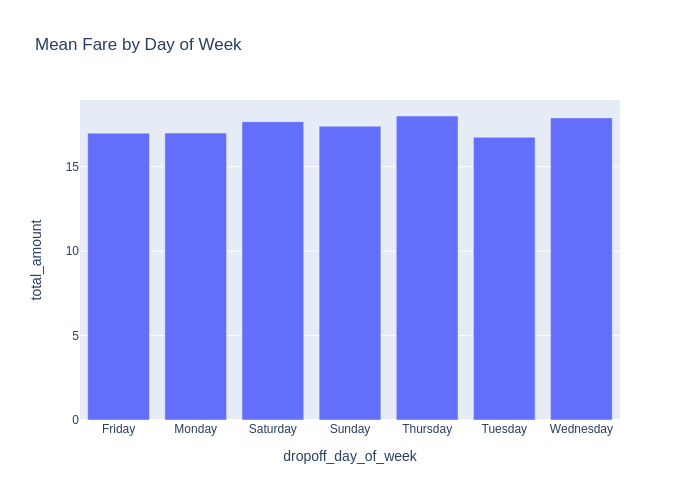

In [85]:
fig = px.bar(x,x="dropoff_day_of_week",y="total_amount",title='Mean Fare by Day of Week')
fig.show("png")

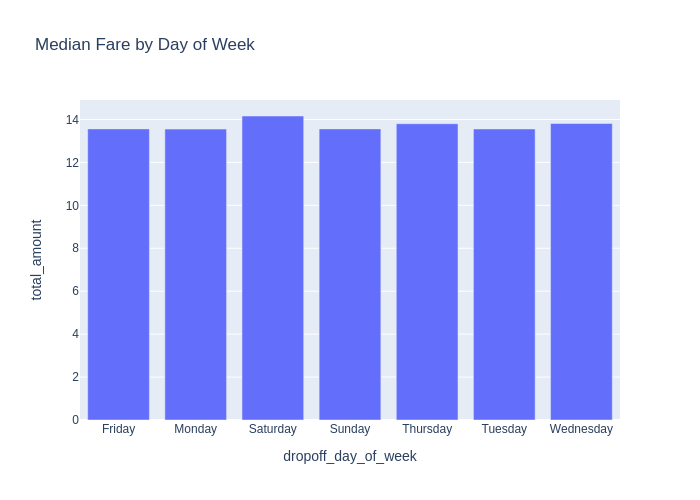

In [86]:
fig = px.bar(med,x="dropoff_day_of_week",y="total_amount",title='Median Fare by Day of Week')
fig.show("png")

More things to plot:

1. Try to plot the most common locations on a map using the taxi_zone_goem data 
1. Get the relationship between fare and the time of pickup and drop 
1. Get the relationship between date of week and fare
1. Get the median fare by date of week
1. Get the median fare by borough 